
# <p style="text-align: center;">MIS 382N: ADVANCED PREDICTIVE MODELING - MSBA</p>
# <p style="text-align: center;">Assignment 2</p>
## <p style="text-align: center;">Total points: 70 </p>
## <p style="text-align: center;">Due: Tuesday, October 1st, submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. You may work in groups of two if you wish. Your partner needs to be from the same section. Only one student per team needs to submit the assignment on Canvas.  But be sure to include name and UTEID for both students.  Homework groups will be created and managed through Canvas, so please do not arbitrarily change your homework group. If you do change, let the TA know. 

Also, please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting. (%matplotlib inline)

# Question 1. Bias-variance (15pts)
Use the following code to read in a small set of data and divide it into training and testing sets. Inputs are x; outputs are y.

In [1]:
import numpy as np
np.random.seed(11)
x_train = np.loadtxt("X_q0_train.csv").reshape(-1,1)
y_train = np.loadtxt("Y_q0_train.csv").reshape(-1,1)
x_test = np.loadtxt("X_q0_test.csv").reshape(-1,1)
y_test = np.loadtxt("Y_q0_test.csv").reshape(-1,1)

We want to build a model that can predict y for unknown inputs x.

(a) (5pts) Fit a linear model to the training data, and report mean squared error on the test data. Plot the data, fitted model, and predictions, clearly denoting the training, testing, and predicted points.

(b) (5pts) Fit polynomial models of degrees 1, 2, 3 and 4 to the training data, and report mean squared error (on both train and test sets) for all the models. Plot the data, the fitted models, and the predicted outputs.

(c) (5pts) Which model performed the best? Explain using the bias-variance tradeoff.

## Answer
(a)

mse = 1204249191.317


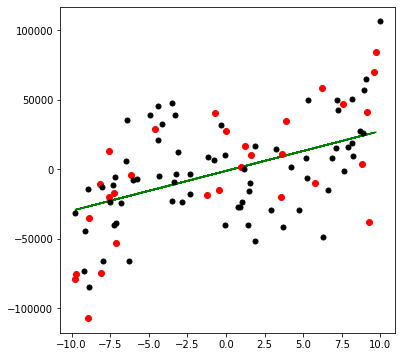

In [2]:
import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

lr = lm.LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
#ax.plot(x, y, '--k')
ax.plot(x_test, y_pred, 'g')
ax.plot(x_test, y_test, 'or')
ax.plot(x_train, y_train, 'ok', ms=5)
print('mse = %.3f' % mse)

(b)

Degree 1 train mse = 966262950.706
Degree 1 test mse = 1204249191.317
Degree 2 train mse = 959519020.639
Degree 2 test mse = 1276392076.968
Degree 3 train mse = 624535477.827
Degree 3 test mse = 1152283991.710
Degree 4 train mse = 622412749.329
Degree 4 test mse = 1183199224.737


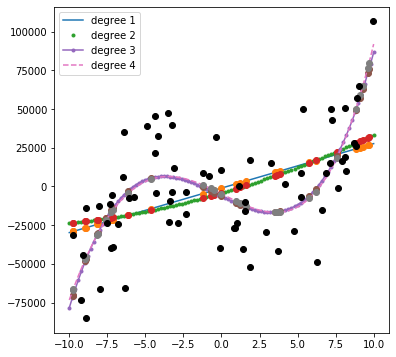

In [3]:
degs = [1, 2, 3, 4]
plot_styles = ['-', '.', '.-', '--']
point_colors = ['blue', 'orange', 'red', 'black']
lrp = lm.LinearRegression()
x_all = np.linspace(-10,10,101)
fig, ax = plt.subplots(1, 1, figsize=(6,6))
for deg, plot_style, point_color in zip(degs, plot_styles, point_colors):
    lrp.fit(np.vander(np.squeeze(x_train), deg+1), y_train)
    y_pred = lrp.predict(np.vander(np.squeeze(x_test), deg+1))
    y_all = lrp.predict(np.vander(np.squeeze(x_all), deg+1))
    mse = mean_squared_error(y_test, y_pred)
    y_pred_train = lrp.predict(np.vander(np.squeeze(x_train), deg+1))
    mse_train = mean_squared_error(y_train, y_pred_train)
    ax.plot(x_all, y_all, plot_style, label='degree %d' % deg)
    ax.plot(x_test, y_pred, 'o')
    ax.legend(loc=2)
    print('Degree %d train mse = %.3f' % (deg, mse_train))
    print('Degree %d test mse = %.3f' % (deg, mse))
ax.plot(x_train, y_train, 'ok')

(c) The polynomial model of degree 3 performed the best. 

# Question 2. Number of data points required for Linear Regression (30pts)

In this question, we will explore empirically estimating a known data distribution. Let the data be generated by the probabilistic model $y_i = w^T x_i + \epsilon$. Here $x$ is 10 dimensional, and it's features are uniformly drawn values from $0$ to $1$. The true coefficients $w$ are set to be $1, 2, 3, \dots, 10$. Epsilon is drawn from a 0 mean unit variance normal distribution. We can now estimate these true coefficients by using linear regression on sample data points from the distribution. 

1. Generate 100 sample points $(y, x)$ according to the above distribution. Use the [np.matmul](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html) function. (2pts)
2. Fit a linear regression model through the above data and report the MSE. (3 pts)
3. Generate 50 sample points $(y, x)$ to be the test set. Now, generate different amounts of train data points ranging from 20 data points to 1000 data points and plot how the MSE varies with increasing the train data. At the point where the MSE is minimum, print the corresponding coefficients. (10pts)
4. Using the MSE between the known true coefficients and the estimated coefficients as the metric, about how many data points are required to have an MSE < 0.01? (run this for 10 trials and report the mean number of data points it takes). Now use only the first three coefficients, generate $x$ which is 3 dimensional (instead of 10 dimensional as before) and the corresponding $y$. When $x$ is three dimensional, how many data points are required to have an MSE < 0.01? (run this for 10 trials and report the mean number of data points it takes).(15pts)


In [4]:
#some useful code
# w_true = np.arange(10)+1
# x = np.random.uniform(size=(n, 10))
# e = np.random.normal(size=(n))

#for the (5) the following code is useful:
# w_true_3 = w_true[0:3]
# x_3_dimensional = np.random.uniform(size=(n, 3))

1.

In [5]:
np.random.seed(11)
n = 100
w_true = np.arange(10)+1
x = np.random.uniform(size=(n, 10))
e = np.random.normal(size=(n))
y = np.matmul(x, w_true) + e
print(y)

[30.22447439 16.86153898 19.24890064 33.25476987 30.34702322 24.20158694
 39.45416637 24.43176664 36.97055017 28.9158984  20.83009707 31.72291452
 39.22333889 33.34912    26.97820921 23.35829866 34.14872209 25.09041191
 31.19748852 22.52638077 32.18901117 28.36325029 19.7220934  33.37731819
 21.95519266 29.88781052 24.22441156 28.49518847 19.96431282 19.66790824
 21.31949148 30.79228164 31.76789856 25.51157745 31.29024232 26.73635354
 28.46149597 18.80323675 28.99824625 34.30368338 26.66710466 28.69800443
 26.36129146 23.29100017 23.37475659 30.51363668 31.43007995 21.91697861
 26.1932316  23.86342991 22.2876177  30.58414755 28.27218772 24.77048042
 25.94811179 29.72388594 29.92084976 26.55515704 29.01417248 24.7755751
 30.25018227 44.44432415 19.73205283 28.96432017 23.75156721 24.39826182
 27.90414796 15.31118207 14.50616062 33.06242798 29.54888765 28.95343734
 29.04138556 41.94351545 33.24595838 27.87934698 32.83181713 26.4009884
 35.34521499 33.74957295 31.80057163 22.05049618 29.0

2.

In [6]:
lrp = lm.LinearRegression()
lrp.fit(x, y)
y_pred = lrp.predict(x)
mse = mean_squared_error(y, y_pred)
print(mse)

1.0134375615734867


3. 

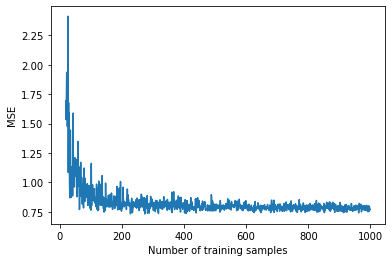

coefficients when mse is minimum :  [ 1.01917971  1.91344013  3.01775026  3.93067277  5.10167029  5.84916888
  6.94415036  7.9628181   8.93399661 10.19986338]


In [16]:
test_n = 50
x_test = np.random.uniform(size=(test_n, 10))
e_test = np.random.normal(size=(test_n))
y_test = np.matmul(x_test, w_true) + e_test

all_n = []
all_mse = []
min_mse = 10000
best_coeff = None

for n in range (20, 1000):
    x = np.random.uniform(size=(n, 10))
    e = np.random.normal(size=(n))
    y = np.matmul(x, w_true) + e
    lrp = lm.LinearRegression()
    lrp.fit(x, y)
    y_pred = lrp.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    all_n.append(n)
    all_mse.append(mse)
    
    if mse < min_mse:
        best_coeff = lrp.coef_

plt.clf()
plt.plot(all_n, all_mse)
plt.ylabel('MSE')
plt.xlabel('Number of training samples')
plt.show()

print('coefficients when mse is minimum : ', best_coeff)

4. 

In [22]:
print('when x is 10 dimensional')

total_n = 0 
for trial in range(10):
    for n in range (2, 1000):
        x = np.random.uniform(size=(n, 10))
        e = np.random.normal(size=(n))
        y = np.matmul(x, w_true) + e
        lrp = lm.LinearRegression()
        lrp.fit(x, y)
        mse = mean_squared_error(w_true, lrp.coef_)
        if mse < 0.01:
            total_n += n
            break

print('about {} data points are required'.format(int(total_n/10)))

total_n = 0 
w_true_3 = w_true[0:3]
print('when x is 3 dimensional')
for trial in range(10):
    for n in range (2, 1000):
        x = np.random.uniform(size=(n, 3))
        e = np.random.normal(size=(n))
        y = np.matmul(x, w_true_3) + e
        lrp = lm.LinearRegression()
        lrp.fit(x, y)
        mse = mean_squared_error(w_true_3, lrp.coef_)
        if mse < 0.01:
            total_n += n
            break
print('about {} data points are required'.format(int(total_n/10)))

when x is 10 dimensional
about 318 data points are required
when x is 3 dimensional
about 96 data points are required


anythhing from 200 to 400 is fine for 10 dimensional 

anything from 50 to 150 is fine for 3 dimensional

# Question 3. Data Imputation Strategies (20pts)

The missing value problem is inevitable in predictive modeling and in order to build a useful model it is important that these missing values are handled appropriately. There could be many reasons for the presence of missing values(represented as NaN in python) in the dataset, like the absence of information corresponding to the variable, failure to record the available value of the variable, some unknown semantics associated with NaN, etc. 

For the given dataset(file named q3_dataset.csv), fit a Linear Regression model to predict the dependent variable 'ViolentCrimesPerPop'. If you directly try to fit a model you would see an error saying that input contains NaN. So, in order to successfully fit a model, you need to handle these missing values and the performance of your model would depend on how you handle them. 

Your task is to try different imputation strategies for the different columns having missing values and see what works best. You could try the following -
1. Discard rows with missing data
2. Fill NaNs with 0s
3. Fill NaNs with column mean/mode/median
4. Use information from related columns (think of how you could do this).

A strategy could work better for one column and not work for another. Briefly justify why do you think that a particular strategy works better than the other.

Hint: Think about how do the missing values occur for a particular column like are they random or systematic, do they have any semantics?

In [3]:
import pandas as pd
dataset = pd.read_csv('q3_dataset.csv')

In [4]:
print("Column-wise missing value percentage")
dataset.isnull().sum()/len(dataset)*100

Column-wise missing value percentage


ViolentCrimesPerPop     0.000000
PolicBudgPerPop        84.002006
population              9.979940
householdsize          19.959880
numbUrban               7.321966
pctUrban                0.000000
medIncome               0.000000
perCapInc               0.000000
LandArea                0.000000
PopDens                 0.000000
PolicCars              84.002006
PctUnemployed           4.964895
PctEmploy               4.964895
dtype: float64

### Answer

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

dataset_prime = dataset.copy()
print(dataset_prime.isnull().sum()/len(dataset)*100)

X = dataset_prime.drop(['ViolentCrimesPerPop'],axis=1)
Y = dataset_prime['ViolentCrimesPerPop']


ViolentCrimesPerPop     0.000000
PolicBudgPerPop        84.002006
population              9.979940
householdsize          19.959880
numbUrban               7.321966
pctUrban                0.000000
medIncome               0.000000
perCapInc               0.000000
LandArea                0.000000
PopDens                 0.000000
PolicCars              84.002006
PctUnemployed           4.964895
PctEmploy               4.964895
dtype: float64


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.30, random_state=11)

In [33]:
### Add extra variables that encode the information if this variable is missing or not then impute 

X_train['isPolicBudgPerPopNull'] = X_train['PolicBudgPerPop'].isnull().astype(int)
X_test['isPolicBudgPerPopNull'] = X_test['PolicBudgPerPop'].isnull().astype(int)

X_train['isPolicCarsNull'] = X_train['PolicCars'].isnull().astype(int)
X_test['isPolicCarsNull'] = X_test['PolicCars'].isnull().astype(int)

X_train['PolicCars'].fillna(0,inplace=True)
X_test['PolicCars'].fillna(0,inplace=True)

X_train['PolicBudgPerPop'].fillna(0,inplace=True)
X_test['PolicBudgPerPop'].fillna(0,inplace=True)

###
X_train['numbUrban'].fillna(np.nanmean(X_train['numbUrban']),inplace=True)
X_test['numbUrban'].fillna(np.nanmean(X_train['numbUrban']),inplace=True)

####
X_train['PctUnemployed'].fillna(np.nanmedian(X_train['PctUnemployed']),inplace=True)
X_test['PctUnemployed'].fillna(np.nanmedian(X_train['PctUnemployed']),inplace=True)

X_train['PctEmploy'].fillna(np.nanmedian(X_train['PctEmploy']),inplace=True)
X_test['PctEmploy'].fillna(np.nanmedian(X_train['PctEmploy']),inplace=True)


### learn from other features 
featNotNullIdx = X_train['population'].notnull()

features = ['numbUrban','PolicBudgPerPop','pctUrban','medIncome','perCapInc','LandArea','PopDens','PctUnemployed']
X_train_feat = X_train[featNotNullIdx].copy()
X_train_feat = X_train_feat[features]
Y_train_feat = X_train['population'][featNotNullIdx]

lm = linear_model.LinearRegression()
lm.fit(X_train_feat, Y_train_feat)
X_train['predicted_population'] = lm.predict(X_train[features])
X_test['predicted_population'] = lm.predict(X_test[features])

#### 
featNotNullIdx = X_train['householdsize'].notnull()

features = ['pctUrban','medIncome','perCapInc','LandArea','PopDens','PctUnemployed','predicted_population']
X_train_feat = X_train[featNotNullIdx].copy()
X_train_feat = X_train_feat[features]
Y_train_feat = X_train['householdsize'][featNotNullIdx]

lm = linear_model.LinearRegression()
lm.fit(X_train_feat, Y_train_feat)
X_train['predicted_householdsize'] = lm.predict(X_train[features])
X_test['predicted_householdsize'] = lm.predict(X_test[features])


features_final = ['isPolicCarsNull','isPolicBudgPerPopNull','PolicBudgPerPop','numbUrban','pctUrban','medIncome','perCapInc','LandArea','PopDens','PolicCars','PctUnemployed','PctEmploy','predicted_householdsize','predicted_population']
print(X_train[features_final].isnull().sum()/len(dataset)*100)


/Users/dm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/dm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/dm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

isPolicCarsNull            0.0
isPolicBudgPerPopNull      0.0
PolicBudgPerPop            0.0
numbUrban                  0.0
pctUrban                   0.0
medIncome                  0.0
perCapInc                  0.0
LandArea                   0.0
PopDens                    0.0
PolicCars                  0.0
PctUnemployed              0.0
PctEmploy                  0.0
predicted_householdsize    0.0
predicted_population       0.0
dtype: float64


/Users/dm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/dm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/dm/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

In [34]:

lm.fit(X_train[features_final], Y_train)
y_hat = lm.predict(X_test[features_final])

print("",mean_squared_error(y_hat,Y_test))


 0.03483223369514086


# Question 4. PCA (conceptual) (5pts)

True of False : The goal of PCA is to create a lower dimensional representation with prinicipal components that are best at predicting the output variable.
Justify your answer.

Answer: False.
The principal components produced by PCA may or may not turn out to be discriminative features. This is because PCA is an unsupervised learning algorithm and it only tries to choose the directions that capture the most variance in the data.